# L'objectif de ce script est de décrire la différence entre la taille et la composition du parc tels que répertoriés dans les données des Comptes du Transport, et celles des enquêtes Budget des Familles.

# Import de modules généraux

In [1]:
from __future__ import division

import seaborn

# Import de données des Comptes des Transports et modules spécifiques à Openfisca

In [2]:
from ipp_macro_series_parser.agregats_transports.transports_cleaner import g2_1
from openfisca_france_indirect_taxation.examples.utils_example import get_input_data_frame, graph_builder_line


# Import d'une nouvelle palette de couleurs

In [3]:
seaborn.set_palette(seaborn.color_palette("Set2", 12))
%matplotlib inline

# Sélection des données des Compte des Transports utilisées et organisation de la dataframe

In [4]:
comparaison_vehicules = g2_1[g2_1['categorie'] == u'Voitures particulières']
del comparaison_vehicules['categorie']
comparaison_vehicules = comparaison_vehicules.set_index('index')
comparaison_vehicules = comparaison_vehicules.transpose()
comparaison_vehicules.rename(columns = {'Total': 'total agregats', 'dont essence': 'essence agregats',
    'dont Diesel': 'diesel agregats'}, inplace = True)
comparaison_vehicules['diesel bdf'] = 0
comparaison_vehicules['essence bdf'] = 0
comparaison_vehicules['total bdf'] = 0


# Sélection des données Budget des Familles utilisées et organisation de la dataframe

In [5]:
for year in [2000, 2005, 2011]:
    aggregates_data_frame = get_input_data_frame(year)
    df_nombre_vehicules_bdf = aggregates_data_frame[['veh_diesel'] + ['veh_essence'] + ['pondmen']]
    nombre_vehicules_diesel_bdf = (
        df_nombre_vehicules_bdf['veh_diesel'] * df_nombre_vehicules_bdf['pondmen']
        ).sum() / 1000
    comparaison_vehicules.loc[comparaison_vehicules.index == year, 'diesel bdf'] = \
        nombre_vehicules_diesel_bdf

    nombre_vehicules_essence_bdf = (
        df_nombre_vehicules_bdf['veh_essence'] * df_nombre_vehicules_bdf['pondmen']
        ).sum() / 1000
    comparaison_vehicules.loc[comparaison_vehicules.index == year, 'essence bdf'] = \
        nombre_vehicules_essence_bdf

    nombre_vehicules_total_bdf = (
        (df_nombre_vehicules_bdf['veh_essence'] + df_nombre_vehicules_bdf['veh_diesel']) *
        df_nombre_vehicules_bdf['pondmen']
        ).sum() / 1000
    comparaison_vehicules.loc[comparaison_vehicules.index == year, 'total bdf'] = \
        nombre_vehicules_total_bdf

comparaison_vehicules = comparaison_vehicules[comparaison_vehicules['total bdf'] != 0]


# Réalisation de graphiques

Comparaison nombre de véhicules tous types


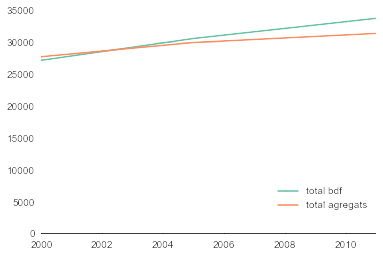

Comparaison nombre de véhicules diesels


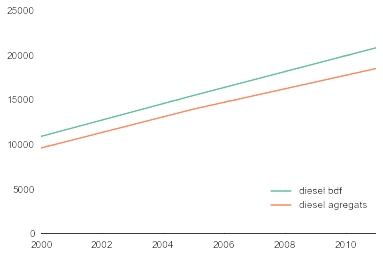

Comparaison nombre de véhicules essences


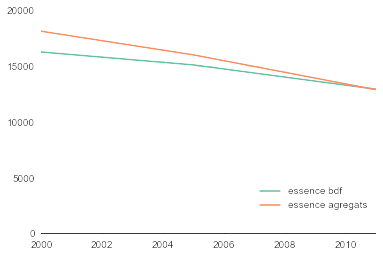

In [7]:
print 'Comparaison nombre de véhicules tous types'
graph_builder_line(comparaison_vehicules[['total bdf'] + ['total agregats']])
print 'Comparaison nombre de véhicules diesels'
graph_builder_line(comparaison_vehicules[['diesel bdf'] + ['diesel agregats']])
print 'Comparaison nombre de véhicules essences'
graph_builder_line(comparaison_vehicules[['essence bdf'] + ['essence agregats']])